In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Objective: trying to predict if tomorrow would be raining in Australia

In [60]:
weather = pd.read_csv('weatherAUS.csv')

# EDA checking the dataset

In [61]:
weather.shape

(142193, 24)

In [62]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [63]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# The dataset has an imbalance problem, maybe due to the actual weather in Australia

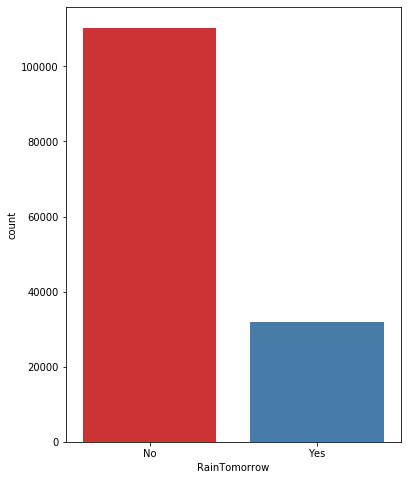

In [64]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=weather, palette="Set1")
plt.show()

In [65]:
weather.describe

<bound method NDFrame.describe of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN          

# Visalize the missing part of data

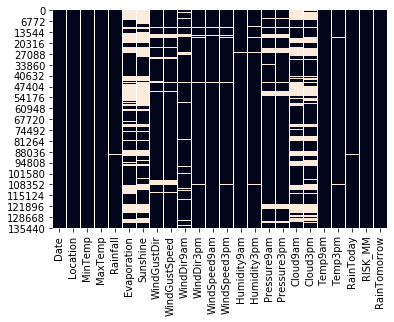

In [66]:
sns.heatmap(weather.isnull(), cbar=False)

# Extending the date into year, month, day

In [67]:
weather['year'] = weather['Date'].apply(lambda x: x[0:4])
weather['month'] = weather['Date'].apply(lambda x: x[5:7])
weather['day'] = weather['Date'].apply(lambda x: x[8:])

In [68]:
weather = weather.drop(["Date","Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1) 

# Adding up Annual rainfall in different cities

In [69]:
annual_rain = weather.groupby(['Location']).RISK_MM.sum()/10
a_r = pd.DataFrame(annual_rain)
pd.set_option('display.max_rows', 1000)
mm = a_r.sort_values(by='RISK_MM', ascending=False)
mm

,RISK_MM
Location,
Cairns,1715.68
Darwin,1626.02
CoffsHarbour,1494.66
GoldCoast,1123.28
Sydney,1107.84
Wollongong,1072.00
Townsville,1054.82
Brisbane,994.10
NorahHead,992.14


In [70]:
weather['rain_categories'] = weather['Location']

# Categorise the cities by annual rainfall

In [71]:
weather.loc[weather['Location'] == 'Cairns', 'rain_categories'] = 1
weather.loc[weather['Location'] == 'Darwin', 'rain_categories'] = 1
weather.loc[weather['Location'] == 'CoffsHarbour', 'rain_categories'] = 1
weather.loc[weather['Location'] == 'GoldCoast', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Sydney', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Wollongong', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Townsville', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Brisbane', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'NorahHead', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'MountGinini', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Newcastle', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'NorfolkIsland', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Williamtown', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'SydneyAirport', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Witchcliffe', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Walpole', 'rain_categories'] = 2
weather.loc[weather['Location'] == 'Portland', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'Albany', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'Tuggeranong', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'Penrith', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'BadgerysCreek', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'MountGambier', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'Dartmoor', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'Richmond', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'Launceston', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'Perth', 'rain_categories'] = 3
weather.loc[weather['Location'] == 'Canberra', 'rain_categories'] = 4
weather.loc[weather['Location'] == 'Albury', 'rain_categories'] = 4
weather.loc[weather['Location'] == 'Watsonia', 'rain_categories'] = 4
weather.loc[weather['Location'] == 'PerthAirport', 'rain_categories'] = 4
weather.loc[weather['Location'] == 'Ballarat', 'rain_categories'] = 4
weather.loc[weather['Location'] == 'Hobart', 'rain_categories'] = 4
weather.loc[weather['Location'] == 'WaggaWagga', 'rain_categories'] = 4
weather.loc[weather['Location'] == 'Katherine', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'Bendigo', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'Adelaide', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'Moree', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'PearceRAAF', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'Melbourne', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'Sale', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'MelbourneAirport', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'Nuriootpa', 'rain_categories'] = 5
weather.loc[weather['Location'] == 'Cobar', 'rain_categories'] = 6
weather.loc[weather['Location'] == 'SalmonGums', 'rain_categories'] = 6
weather.loc[weather['Location'] == 'Mildura', 'rain_categories'] = 6
weather.loc[weather['Location'] == 'AliceSprings', 'rain_categories'] = 6
weather.loc[weather['Location'] == 'Nhil', 'rain_categories'] = 6
weather.loc[weather['Location'] == 'Woomera', 'rain_categories'] = 6
weather.loc[weather['Location'] == 'Uluru', 'rain_categories'] = 6

weather['rain_categories'] 

0         4
1         4
2         4
3         4
4         4
         ..
142188    6
142189    6
142190    6
142191    6
142192    6
Name: rain_categories, Length: 142193, dtype: int64

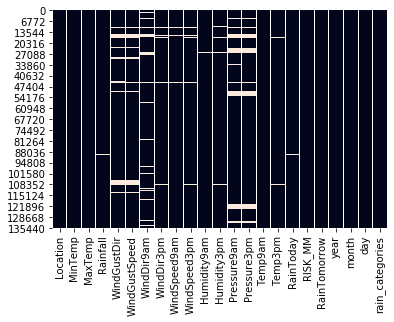

In [72]:
sns.heatmap(weather.isnull(), cbar=False)

In [73]:
weather.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow', 'year', 'month', 'day', 'rain_categories'],
      dtype='object')

In [74]:
weather = weather.dropna()

In [75]:
weather = weather.drop(['Location','WindGustDir','WindGustSpeed','WindDir9am','WindSpeed9am','year','day','RISK_MM'], axis=1)

In [76]:
# encoding the data
windd3 = pd.get_dummies(weather['WindDir3pm'], drop_first=True)
rainToday = pd.get_dummies(weather['RainToday'], drop_first=True)

In [77]:
weather = weather.drop(['WindDir3pm', 'RainToday'], 1)

In [78]:
# Use  .concat() method to merge the series data into one dataframe
new_weather = pd.concat([weather, windd3, rainToday], axis=1)
new_weather

,MinTemp,MaxTemp,Rainfall,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,Yes
0,13.4,22.9,0.6,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,...,0,0,0,0,0,0,0,0,0,0
142189,2.8,23.4,0.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,...,0,0,0,0,0,0,0,0,0,0
142190,3.6,25.3,0.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,...,0,0,0,0,0,0,0,0,0,0
142191,5.4,26.9,0.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,...,0,0,0,0,0,0,0,1,0,0


In [79]:
new_weather.isnull().any()

MinTemp            False
MaxTemp            False
Rainfall           False
WindSpeed3pm       False
Humidity9am        False
Humidity3pm        False
Pressure9am        False
Pressure3pm        False
Temp9am            False
Temp3pm            False
RainTomorrow       False
month              False
rain_categories    False
ENE                False
ESE                False
N                  False
NE                 False
NNE                False
NNW                False
NW                 False
S                  False
SE                 False
SSE                False
SSW                False
SW                 False
W                  False
WNW                False
WSW                False
Yes                False
dtype: bool

In [80]:
new_weather.RainTomorrow.value_counts()

No     87906
Yes    25019
Name: RainTomorrow, dtype: int64

In [81]:
new_weather['RainTomorrow']=new_weather.RainTomorrow.replace('No', '0').replace('Yes', '1')

In [82]:
Y = new_weather["RainTomorrow"]
X = new_weather.drop(["RainTomorrow"], axis=1)

In [25]:
from sklearn import preprocessing

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()

In [27]:
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Apply on SVC

In [29]:
from sklearn.svm import SVC

clf = SVC(gamma='scale')

In [30]:
clf.fit(X_scaled, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
predictions = clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions, Y_test)

In [33]:
accuracy

0.8467146820945747

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     26252
           1       0.79      0.44      0.56      7626

    accuracy                           0.85     33878
   macro avg       0.82      0.70      0.74     33878
weighted avg       0.84      0.85      0.83     33878



In [35]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[3346, 913]
[4280, 25339]


# Apply on RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, Y_train)

Y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(Y_test, Y_pred_rf))

0.8317787354625421


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     26252
           1       0.79      0.44      0.56      7626

    accuracy                           0.85     33878
   macro avg       0.82      0.70      0.74     33878
weighted avg       0.84      0.85      0.83     33878



In [38]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[3346, 913]
[4280, 25339]


In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [40]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(Y_test, Y_pred_rf))

0.8317787354625421


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     26252
           1       0.79      0.44      0.56      7626

    accuracy                           0.85     33878
   macro avg       0.82      0.70      0.74     33878
weighted avg       0.84      0.85      0.83     33878



In [42]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

[3346, 913]
[4280, 25339]


In [43]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_rf)

0.03559995019324702

# Apply on Logistic

In [44]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, Y_train)
print(logmodel.coef_)
print(logmodel.intercept_)

[[ 2.10435965e+00  1.99380121e+00  3.78063415e+00  9.73904628e-01
  -4.81095026e-01  6.42390468e+00  5.45578058e+00 -1.04285565e+01
  -9.48491249e-01 -3.69726809e+00  4.62361866e-02  5.32121143e-01
  -1.13162557e-01  2.73405783e-02  5.16827243e-01 -2.11345850e-01
   2.29077102e-01  6.69205086e-01  6.17098269e-01 -1.74445709e-03
  -7.30436826e-03 -8.81018988e-02  5.74552164e-02  2.24825540e-02
   3.27406169e-01  4.88989053e-01  1.85022774e-01  6.60516318e-01]]
[-2.40532753]


/Users/tzemingho/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
#Predicting the target for test data
predictions_train = logmodel.predict(X_train)

predictions = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     26252
           1       0.72      0.47      0.57      7626

    accuracy                           0.84     33878
   macro avg       0.79      0.71      0.74     33878
weighted avg       0.83      0.84      0.83     33878



In [48]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

24898 1354 4063 3563
[3563, 1354]
[4063, 24898]


# Impliment SMOTE to see if there is any improvement

In [95]:
from collections import Counter
from sklearn.datasets import make_classification
import imblearn
from imblearn.over_sampling import SMOTE

In [96]:
print('Original dataset shape %s' % Counter(Y))

Original dataset shape Counter({'0': 87906, '1': 25019})


In [97]:
sm = SMOTE(random_state=42)

In [98]:
X_res, y_res = sm.fit_resample(X, Y)

In [99]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'0': 87906, '1': 87906})


# SMOTE with SVC

In [100]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_res), columns=X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42)

from sklearn.svm import SVC

clf = SVC(gamma='scale')

clf.fit(X_scaled, y_res)

predictions = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions, Y_test)


In [101]:
print(accuracy)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,predictions))

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print([tp,fp])
print([fn,tn])

0.8609130896405278
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     26284
           1       0.89      0.83      0.86     26460

    accuracy                           0.86     52744
   macro avg       0.86      0.86      0.86     52744
weighted avg       0.86      0.86      0.86     52744

[21925, 2801]
[4535, 23483]


# SMOTE with RandomForest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_scaled, y_res)

Y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(Y_test, Y_pred_rf))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,Y_pred_rf))

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print([tp,fp])
print([fn,tn])

from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_rf)

0.7899855907780979
              precision    recall  f1-score   support

           0       0.78      0.81      0.79     26284
           1       0.80      0.77      0.79     26460

    accuracy                           0.79     52744
   macro avg       0.79      0.79      0.79     52744
weighted avg       0.79      0.79      0.79     52744

[20449, 5066]
[6011, 21218]


0.15993300920361386

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.05, random_state=42)
ada_clf.fit(X_scaled, y_res)

y_pred_AD = ada_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred_AD))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y_test,y_pred_AD))

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_AD).ravel()
print([tp,fp])
print([fn,tn])

from sklearn.metrics import r2_score
r2_score(Y_test, y_pred_AD)

0.8579743667526164
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     26284
           1       0.87      0.84      0.86     26460

    accuracy                           0.86     52744
   macro avg       0.86      0.86      0.86     52744
weighted avg       0.86      0.86      0.86     52744

[22162, 3193]
[4298, 23091]


0.4318911412787101

In [ ]:
feature_importances_

# SMOTE with Logistic

In [106]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_scaled, y_res)
print(logmodel.coef_)
print(logmodel.intercept_)

[[  2.22135976   2.24399774   5.9033825    1.8687455   -0.34527343
    6.06464477   5.11232696 -11.48007333  -2.40854999  -3.68478211
    0.09804345   0.09456995  -3.58455524  -3.44132767  -2.87149254
   -3.72200439  -3.30011495  -2.91020337  -2.94066553  -3.36750567
   -3.35396129  -3.47683278  -3.34074192  -3.49859834  -3.2011498
   -3.09148706  -3.32323548   0.43016919]]
[2.86662085]


/Users/tzemingho/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [107]:
#Predicting the target for test data
predictions_train = logmodel.predict(X_train)

predictions = logmodel.predict(X_test)

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(Y_test,predictions))


from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     26284
           1       0.87      0.82      0.84     26460

    accuracy                           0.85     52744
   macro avg       0.85      0.85      0.85     52744
weighted avg       0.85      0.85      0.85     52744

23011 3273 4716 21744
[21744, 3273]
[4716, 23011]


# Conculsion

# Problems encountered due to the process
 1. Too many missing values.
 2. If impute with mean and median, the shape of dateset changed a lot from the distribution of the actual dataset.
 3. The Dataset is highly imbalanced with 'No' having more  counts than 'Yes'.

# Improvement

1. Get more data
2. Specify the city to predict weather